In [42]:
import numpy as np
import scipy as sc
import matplotlib.pylab as plt

from sklearn.datasets import make_circles

[[-0.1880283   1.05066258]
 [ 0.3056713   0.27437667]
 [ 0.07560979 -0.49830962]
 [-0.31724501  0.37321536]
 [ 0.19223356  0.49761322]
 [-0.28665853 -0.38190634]
 [ 0.29927531  0.15931998]
 [-0.87036359  0.58960236]
 [ 0.74419149  0.63854177]
 [ 0.45130687  0.93112068]
 [ 0.51876936 -0.20209461]
 [-0.16532821  0.4101407 ]
 [ 0.34918963 -0.87174245]
 [-0.50624078 -0.02377403]
 [-0.38359525 -0.16443421]
 [ 0.37916649 -0.4054329 ]
 [-0.3807925  -0.3384719 ]
 [ 0.64526364 -0.76694042]
 [ 0.88355461  0.5073675 ]
 [ 0.17010719  0.95804409]
 [ 0.40845188  0.14156911]
 [ 0.47281102 -0.20158827]
 [ 0.49656559 -0.81018849]
 [-0.43997766  0.37484783]
 [ 0.32174511 -0.83563927]
 [-1.06693744  0.00954365]
 [-0.51087896 -0.85979256]
 [ 0.02243118 -0.51108821]
 [-0.26634748 -0.44976325]
 [ 0.95586749 -0.34326288]
 [-0.07395291  0.91154914]
 [-0.88097236 -0.16534108]
 [-0.06836354  1.02285528]
 [ 1.04433153 -0.13250003]
 [-0.07962237 -1.04734792]
 [ 0.31361102 -0.88799762]
 [-0.54917224  0.12138463]
 

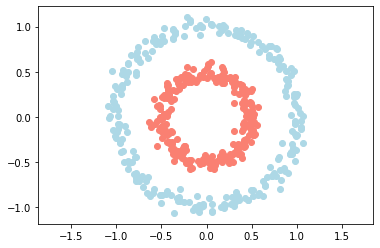

In [44]:
# el data set
n = 500
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:,np.newaxis]
print (X)
print (Y)

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='lightblue')
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='salmon')
plt.axis('equal')

plt.show()


In [18]:
# clase de la capa de la red

class capa_neuronal():
    def __init__(self, n_conexiones, n_neuronas, act_fun):
        self.act_fun = act_fun
        
        self.b = np.random.rand(1, n_neuronas) * - 1
        self.W = np.random.rand(n_conexiones, n_neuronas) * - 1

In [19]:
# funciones de activacion

sigm = (lambda x: 1/(1+np.e**(-x)), 
        lambda x: x*(1-x))

In [20]:
# creando las capas de la neurona

l0 = capa_neuronal(p, 4, sigm)
l1 = capa_neuronal(4, 8, sigm)

In [21]:
# creando de forma arbitraria

def crear_nn(topology, act_f):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(capa_neuronal(topology[l], topology[l+1], act_f))
    return nn



In [40]:
topology = [p, 4, 8, 1]

red_neuronal = crear_nn(topology, sigm)

# error cuadratico medio
l2_costo = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(red_neuronal, X, Y, l2_costo, lr=0.5, train=True):
    out = [(None, X)]
    # forward
    for l, layer in enumerate(red_neuronal):
        z = out[-1][1] @ red_neuronal[l].W + red_neuronal[l].b
        a = red_neuronal[l].act_fun[0](z)
        
        out.append((z, a))
    print (l2_costo[0](out[-1][1], Y))
    
    if train:
        #backward propagation
        deltas = []
        for l in reversed(range(0, len(red_neuronal))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            print (a.shape)
            if l == len(red_neuronal) - 1:
                # calcular delta de ultima capa
                deltas.insert(0, l2_costo[1](a, Y) * red_neuronal[l].act_fun[1](a))
            else:
                # calcular delte respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * red_neuronal[l].act_fun[1](a))
       
            _W = red_neuronal[l].W
            #Gradiente descendiente
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            red_neuronal[l].W = red_neuronal[l].W - out[l][1].T @ deltas[0] * lr
    return out[-1][1]
    
train(red_neuronal, X, Y, l2_costo, 0.5)
    
print("")    
    

0.3698194973067538
(500, 1)
(500, 8)
(500, 4)



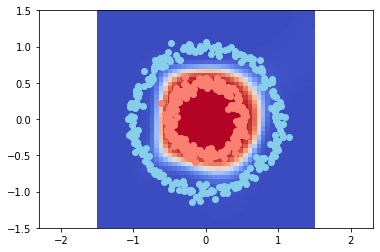

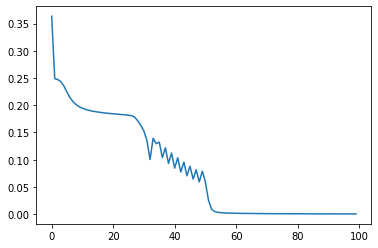

0.000452167768215883
(500, 1)
(500, 8)
(500, 4)
0.00045182112191765044
(500, 1)
(500, 8)
(500, 4)
0.00045147498205714724
(500, 1)
(500, 8)
(500, 4)
0.0004511293475345064
(500, 1)
(500, 8)
(500, 4)
0.0004507842172530514
(500, 1)
(500, 8)
(500, 4)
0.00045043959011928727
(500, 1)
(500, 8)
(500, 4)
0.00045009546504288475
(500, 1)
(500, 8)
(500, 4)
0.0004497518409366744
(500, 1)
(500, 8)
(500, 4)
0.0004494087167166303
(500, 1)
(500, 8)
(500, 4)
0.0004490660913018591
(500, 1)
(500, 8)
(500, 4)
0.00044872396361459295
(500, 1)
(500, 8)
(500, 4)
0.00044838233258017146
(500, 1)
(500, 8)
(500, 4)
0.0004480411971270375
(500, 1)
(500, 8)
(500, 4)
0.0004477005561867197
(500, 1)
(500, 8)
(500, 4)
0.00044736040869382656
(500, 1)
(500, 8)
(500, 4)
0.0004470207535860296
(500, 1)
(500, 8)
(500, 4)
0.0004466815898040578
(500, 1)
(500, 8)
(500, 4)
0.0004463429162916828
(500, 1)
(500, 8)
(500, 4)
0.0004460047319957119
(500, 1)
(500, 8)
(500, 4)
0.0004456670358659723
(500, 1)
(500, 8)
(500, 4)
0.000445329826

In [41]:
import time
from IPython.display import clear_output

neural_n = crear_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_costo, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_costo[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_costo, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  